In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [13]:
df = pd.read_csv('Netflix.csv')

In [15]:
df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [4]:
df.duplicated().sum()

2

In [5]:
df.drop_duplicates(inplace = True)

In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64

<Axes: >

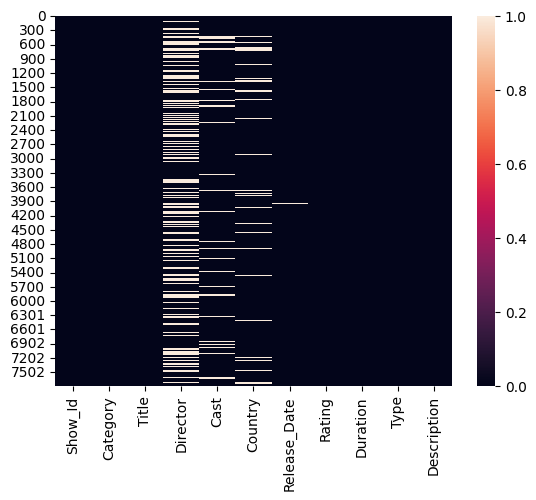

In [11]:
sns.heatmap(df.isnull())

In [12]:
df[df['Title'] == 'House of Cards']

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
2832,s2833,TV Show,House of Cards,"Robin Wright, David Fincher, Gerald McRaney, J...","Kevin Spacey, Robin Wright, Kate Mara, Corey S...",United States,"November 2, 2018",TV-MA,6 Seasons,"TV Dramas, TV Thrillers",A ruthless politician will stop at nothing to ...


In [12]:
df[df['Title'] == 'House of Cards'][['Show_Id','Director']]

,Show_Id,Director
2832,s2833,"Robin Wright, David Fincher, Gerald McRaney, J..."


In [13]:
df[df['Title'].str.contains('Cards')]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
2832,s2833,TV Show,House of Cards,"Robin Wright, David Fincher, Gerald McRaney, J...","Kevin Spacey, Robin Wright, Kate Mara, Corey S...",United States,"November 2, 2018",TV-MA,6 Seasons,"TV Dramas, TV Thrillers",A ruthless politician will stop at nothing to ...
6547,s6546,Movie,The Land of Cards,Qaushiq Mukherjee,"Joyraj Bhattacharya, Rii, Soumyak Kanti DeBisw...",India,"November 22, 2016",TV-14,113 min,"Dramas, Independent Movies, International Movies",A royal prince arrives on an island of fascist...


In [14]:
df.dtypes

Show_Id         object
Category        object
Title           object
Director        object
Cast            object
Country         object
Release_Date    object
Rating          object
Duration        object
Type            object
Description     object
dtype: object

In [16]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'], format='mixed', dayfirst=True)
# df['publish_date'] = pd.to_datetime(df['publish_time'].dt.date)

In [15]:
df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [17]:
df['Release_Date'].dt.year.value_counts()

Release_Date
2019.0    2153
2020.0    2009
2018.0    1685
2017.0    1225
2016.0     443
2021.0     117
2015.0      88
2014.0      25
2011.0      13
2013.0      11
2012.0       3
2008.0       2
2009.0       2
2010.0       1
Name: count, dtype: int64

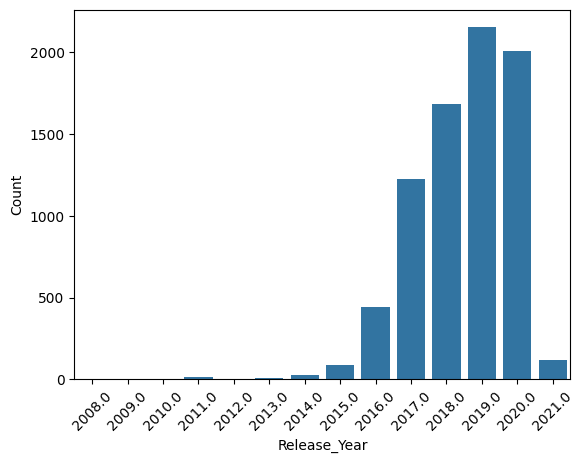

In [93]:
df['Release_Year'] = df['Release_Date'].dt.year
release_year_counts = df['Release_Year'].value_counts().reset_index()
release_year_counts.columns = ['Release_Year', 'Count']
sns.barplot(x='Release_Year', y='Count', data=release_year_counts)
plt.xticks(rotation = 45)
plt.show()

In [2]:
df[df['Category'].isin(['Movie','TV Shows'])].value_counts().reset_index()

NameError: name 'df' is not defined

<Axes: xlabel='count', ylabel='Category'>

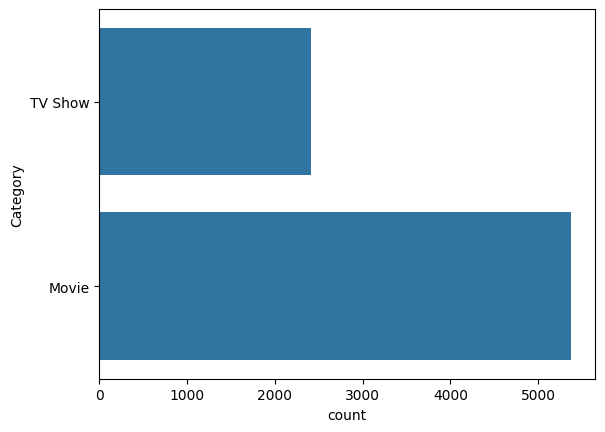

In [125]:
category_counts = df['Category']
category_counts.columns = ['Category', 'Count']
sns.countplot(data=category_counts)

In [119]:
df['Category'].value_counts()

Category
Movie      5377
TV Show    2410
Name: count, dtype: int64

In [140]:
df[(df['Category'] == 'Movie') & (df['Release_Year'] == 2020)].count()

Show_Id         1312
Category        1312
Title           1312
Director        1282
Cast            1245
Country         1251
Release_Date    1312
Rating          1312
Duration        1312
Type            1312
Description     1312
Release_Year    1312
dtype: int64

In [155]:
df[(df['Category'] == 'TV Show') & (df['Country'] == 'India')]['Title']

86            21 Sarfarosh: Saragarhi 1897
132                              7 (Seven)
340                           Agent Raghav
364                           Akbar Birbal
533                    Anjaan: Rural Myths
                       ...                
6249                  The Creative Indians
6400    The Golden Years with Javed Akhtar
6469                The House That Made Me
7294                            Typewriter
7705                       Yeh Meri Family
Name: Title, Length: 71, dtype: object

In [163]:
df['Director'].value_counts()

Director
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Jay Chapman               12
                          ..
Vibhu Virender Puri        1
Lucien Jean-Baptiste       1
Jason Krawczyk             1
Quinn Lasher               1
Sam Dunn                   1
Name: count, Length: 4050, dtype: int64

In [165]:
df[df['Category'].isin(['TV Show','Movie'])]

0       True
1       True
2       True
3       True
4       True
        ... 
7784    True
7785    True
7786    True
7787    True
7788    True
Name: Category, Length: 7787, dtype: bool

In [22]:
df['Director'].value_counts()[:6]

Director
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Jay Chapman               12
Youssef Chahine           12
Name: count, dtype: int64

In [28]:
df[(df['Category'] == 'Movie') & (df['Type'] == 'Comedies') | (df['Country'].str.contains('Kingdom'))]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
1368,s1369,Movie,Christmas Survival,James Dearden,"Julian Ovenden, Gemma Whelan, Joely Richardson...",United Kingdom,2019-11-01,TV-MA,101 min,Comedies,"With Christmas just around the corner, sisters..."
1650,s1651,Movie,Dead in a Week (Or Your Money Back),Tom Edmunds,"Tom Wilkinson, Aneurin Barnard, Freya Mavor, M...",United Kingdom,2019-03-01,TV-MA,90 min,Comedies,After several failed attempts at taking his ow...
2225,s2226,Movie,For Love or Money,Mark Murphy,"Robert Kazinsky, Samantha Barks, Ed Speleers, ...",United Kingdom,2019-08-16,TV-MA,95 min,Comedies,When a goofy but likable millionaire discovers...
2577,s2578,Movie,"Hail, Caesar!","Ethan Coen, Joel Coen","Josh Brolin, George Clooney, Scarlett Johansso...","United States, United Kingdom, Japan",2020-04-16,PG-13,106 min,Comedies,When a major star is kidnapped from a movie se...
4210,s4211,Movie,"Monty Python Live (Mostly): One Down, Five to Go",Eric Idle,"John Cleese, Terry Gilliam, Eric Idle, Terry J...",United Kingdom,2018-10-02,TV-MA,137 min,Comedies,"Live from London in a sold-out final show, sur..."
4213,s4214,Movie,Monty Python: Live at The Hollywood Bowl,"Terry Hughes, Ian MacNaughton","Graham Chapman, John Cleese, Terry Gilliam, Er...",United Kingdom,2018-10-02,R,80 min,Comedies,Film clips and Terry Gilliam animations featur...
4688,s4689,Movie,Otherhood,NaN,NaN,"United Kingdom, United States",2019-08-02,R,101 min,Comedies,"Feeling forgotten on Mother's Day, three best ..."
4781,s4782,Movie,Parrot Sketch Not Included: Twenty Years of Mo...,Ian MacNaughton,"Steve Martin, John Cleese, Graham Chapman, Ter...",United Kingdom,2018-10-02,TV-14,72 min,Comedies,"Presented by Steve Martin, this anthology draw..."
4792,s4793,Movie,PATRICK (2019),Mandie Fletcher,"Beattie Edmondson, Ed Skrein, Tom Bennett, Jen...",United Kingdom,2019-05-16,TV-PG,94 min,Comedies,"When a schoolteacher inherits an adorable pug,..."
5745,s5745,Movie,Special Correspondents,Ricky Gervais,"Eric Bana, Ricky Gervais, Vera Farmiga, Kelly ...","Canada, United Kingdom, United States",2016-04-29,TV-MA,101 min,Comedies,"When they lose their passports, a bickering ra..."


In [53]:
df.dropna(inplace = True)
# df[df['Cast'].str.contains('Tom Cruise')]

In [56]:
df[df['Cast'] == 'Tom Cruise']
# because there are multiple entries in cast column so thi filtering not works

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description


In [55]:
df[df['Cast'].str.contains('Tom Cruise')]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
3860,s3861,Movie,Magnolia,Paul Thomas Anderson,"Jeremy Blackman, Tom Cruise, Melinda Dillon, A...",United States,2020-01-01,R,189 min,"Dramas, Independent Movies","Through chance, human action, past history and..."
5071,s5071,Movie,Rain Man,Barry Levinson,"Dustin Hoffman, Tom Cruise, Valeria Golino, Ge...",United States,2019-07-01,R,134 min,"Classic Movies, Dramas",A fast-talking yuppie is forced to slow down w...


In [63]:
df['Rating'].value_counts().reset_index()

,Rating,count
0,TV-MA,1666
1,TV-14,1133
2,R,654
3,TV-PG,413
4,PG-13,375
5,PG,238
6,TV-G,80
7,TV-Y,71
8,TV-Y7,69
9,NR,62


In [65]:
df['Rating'].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-G', 'TV-PG', 'NR', 'PG', 'G',
       'TV-Y7', 'TV-Y', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [82]:
df[(df['Rating'] == 'TV-14') & (df['Category'] == 'Movie') & (df['Country'] == 'Canada')].shape

(9, 11)

In [84]:
df[(df['Rating'] == 'R') & (df['Release_Date'].dt.year > 2018) & (df['Category'] == 'TV Show')]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description


In [88]:
df['Duration'].max()
# df.Minutes.max()

'99 min'

In [103]:
df[df['Category'] == 'TV Show']['Country'].value_counts()

Country
United States                                                    27
United Kingdom                                                   19
Japan                                                            10
South Korea                                                      10
Spain                                                             7
Taiwan                                                            6
Turkey                                                            5
India                                                             5
Brazil                                                            4
Canada                                                            3
Thailand                                                          3
Nigeria                                                           3
France                                                            3
China                                                             2
Italy                                   

In [105]:
df.head().sort_values(by = 'Release_Date', ascending = False)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
5060,s5060,Movie,Radium Girls,"Lydia Dean Pilcher, Ginny Mohler","Joey King, Abby Quinn, Cara Seymour, Scott She...",United States,2021-01-16,TV-14,103 min,"Dramas, Independent Movies",When the women at a radium factory begin to fa...
1673,s1674,Movie,Death of Me,Darren Lynn Bousman,"Maggie Q, Luke Hemsworth, Alex Essoe, Ingkarat...","United States, Thailand",2021-01-16,R,94 min,Horror Movies,"With no memory of the previous night, a vacati..."
205,s206,Movie,A Monster Calls,J.A. Bayona,"Lewis MacDougall, Sigourney Weaver, Felicity J...","United Kingdom, Spain, United States",2021-01-16,PG-13,108 min,"Dramas, Sci-Fi & Fantasy","Overwhelmed by his mother’s illness, a young b..."
6977,s6976,Movie,The Vanished,Peter Facinelli,"Thomas Jane, Anne Heche, Jason Patric, John D....",United States,2021-01-15,R,115 min,Thrillers,When their daughter disappears during a family...
1832,s1833,Movie,Double Dad,Cris D'Amato,"Maisa Silva, Eduardo Moscovis, Marcelo Médici,...",Brazil,2021-01-15,TV-G,105 min,"Children & Family Movies, Comedies, Dramas","While her mom is away, a teen sneaks out of th..."
...,...,...,...,...,...,...,...,...,...,...,...
2041,s2042,Movie,Even the Rain,Icíar Bollaín,"Luis Tosar, Gael García Bernal, Juan Carlos Ad...","Spain, Mexico, France",2011-05-17,TV-MA,103 min,"Dramas, International Movies",While making a film about the incursion of Chr...
3840,s3841,Movie,Mad Ron's Prevues from Hell,Jim Monaco,"Nick Pawlow, Jordu Schell, Jay Kushwara, Micha...",United States,2010-11-01,NR,84 min,"Cult Movies, Horror Movies","This collection cherry-picks trailers, forgott..."
5766,s5766,Movie,Splatter,Joe Dante,"Corey Feldman, Tony Todd, Tara Leigh, Erin Way...",United States,2009-11-18,TV-MA,29 min,Horror Movies,"After committing suicide, a washed-up rocker r..."
3248,s3249,Movie,Just Another Love Story,Ole Bornedal,"Anders W. Berthelsen, Rebecka Hemse, Nikolaj L...",Denmark,2009-05-05,TV-MA,104 min,"Dramas, International Movies",When he causes a car accident that leaves a yo...


In [107]:
df[(df['Category'] == 'Movie') & (df['Type'] == 'Dramas')]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,2019-11-01,R,119 min,Dramas,After one of his high school students attacks ...
170,s171,Movie,A Family Man,Mark Williams,"Gerard Butler, Gretchen Mol, Alison Brie, Will...","Canada, United States",2019-12-15,R,110 min,Dramas,A ruthless corporate headhunter battles his ri...
232,s233,Movie,A Stoning in Fulham County,Larry Elikann,"Ken Olin, Jill Eikenberry, Maureen Mueller, Gr...",United States,2011-10-01,TV-14,95 min,Dramas,"After reckless teens kill an Amish child, a pr..."
295,s296,Movie,Across Grace Alley,Ralph Macchio,"Ben Hyland, Marsha Mason, Karina Smirnoff, Col...",United States,2016-12-01,TV-PG,24 min,Dramas,"A young boy, upset by his parents' divorce, be..."
...,...,...,...,...,...,...,...,...,...,...,...
7417,s7416,Movie,Victor,Brandon Dickerson,"Patrick Davis, Lisa Vidal, Josh Pence, José Zú...",United States,2017-07-24,PG-13,110 min,Dramas,"In 1962 Brooklyn, a Puerto Rican teen who join..."
7422,s7421,Movie,Villain,Philip Barantini,"Craig Fairbrass, George Russo, Robert Gleniste...",United Kingdom,2020-09-05,R,97 min,Dramas,"Fresh out of prison, an ex-con tries to save h..."
7449,s7448,Movie,VS.,Ed Lilly,"Connor Swindells, Fola Evans-Akingbola, Nichol...",United Kingdom,2019-06-19,TV-MA,99 min,Dramas,A young man in foster care finds his voice in ...
7465,s7464,Movie,Wakefield,Robin Swicord,"Bryan Cranston, Jennifer Garner, Jason O'Mara,...",United States,2019-03-02,R,109 min,Dramas,An unhappy father and lawyer quits his suburba...
